## Notebook to find and plot some example images to display out processing technique

@author Riley Troyer
science@rileytroyer.com

In [1]:
# Libraries
import cv2
from datetime import datetime
from pathlib import Path
from matplotlib import pyplot as plt
import numpy as np
import os
import sys
import themis_imager_readfile

# Add root to path
path_root = Path('../../').resolve()
sys.path.append(str(path_root))

from src.models.all_tasks_func import decompress_pgm_files_to_dict

2023-07-04 09:43:22.596137: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Select a imager, date, and framenumber
imager = 'rank'
date = datetime(2020, 1, 5).date()

date_folder_path = (f'../../data/raw/testing/stream0/'
                    f'{date.year}/{str(date.month).zfill(2)}/{str(date.day).zfill(2)}/')
                    
# camera_dict example k-v pair: {'atha20200104000206':img[:,:,:]}
camera_dict = {}
camera_dict.clear()

asi_folder_path = os.path.join(date_folder_path, imager + '_themis')
hours = []

print(f'Gathering images for {date} and {imager}.')

for hour_name in os.listdir(asi_folder_path):  # /ut09
    # check if it is a sub folder
    hour_folder_path = os.path.join(asi_folder_path, hour_name)
    if os.path.isdir(hour_folder_path):
        hours.append(hour_folder_path)

for hour in hours:
    decompress_pgm_files_to_dict(hour, camera_dict)
    print(f'Finished for hour: {hour}.')

print('All Finished.')

Gathering images for 2020-01-05 and rank.
Finished for hour: ../../data/raw/testing/stream0/2020/01/05/rank_themis/ut00.
Finished for hour: ../../data/raw/testing/stream0/2020/01/05/rank_themis/ut01.
Finished for hour: ../../data/raw/testing/stream0/2020/01/05/rank_themis/ut02.
Finished for hour: ../../data/raw/testing/stream0/2020/01/05/rank_themis/ut03.
Finished for hour: ../../data/raw/testing/stream0/2020/01/05/rank_themis/ut04.
Finished for hour: ../../data/raw/testing/stream0/2020/01/05/rank_themis/ut05.
Finished for hour: ../../data/raw/testing/stream0/2020/01/05/rank_themis/ut06.
Finished for hour: ../../data/raw/testing/stream0/2020/01/05/rank_themis/ut07.
Finished for hour: ../../data/raw/testing/stream0/2020/01/05/rank_themis/ut08.
Finished for hour: ../../data/raw/testing/stream0/2020/01/05/rank_themis/ut09.
Finished for hour: ../../data/raw/testing/stream0/2020/01/05/rank_themis/ut10.
Finished for hour: ../../data/raw/testing/stream0/2020/01/05/rank_themis/ut11.
Finished f

In [179]:
# Frames for atha20200214
#frame = 6639 # This really shows the good difference, especially for log scaling
# frame = 9667 # Moon and cloudy
#frame = 13547 # I like this one, moon is directly behind tower

# Frames for fsim20200218
#frame = 3615 # Decent discrete aurora with moon
#frame = 5415 # More discrete
#frame = 12080 # Faint pulsating aurora

# Frames for fsmi20200219
#frame = 3558 # Discrete aurora
#frame = 4316

# Frames for gill20200118
#frame = 8569 #clouds with lights on horizon

# Frames for gill20200219
#frame = 5063 # discrete arc

# Frames for kapu20200216
#frame = 4903 # clouds
#frame = 11033 # clouds with moon

# Frames for rank20200319
#frame = 370 # discrete aurora
# Frames for snkq20200218
#frame = 10554 # 

In [19]:
frame = 16902

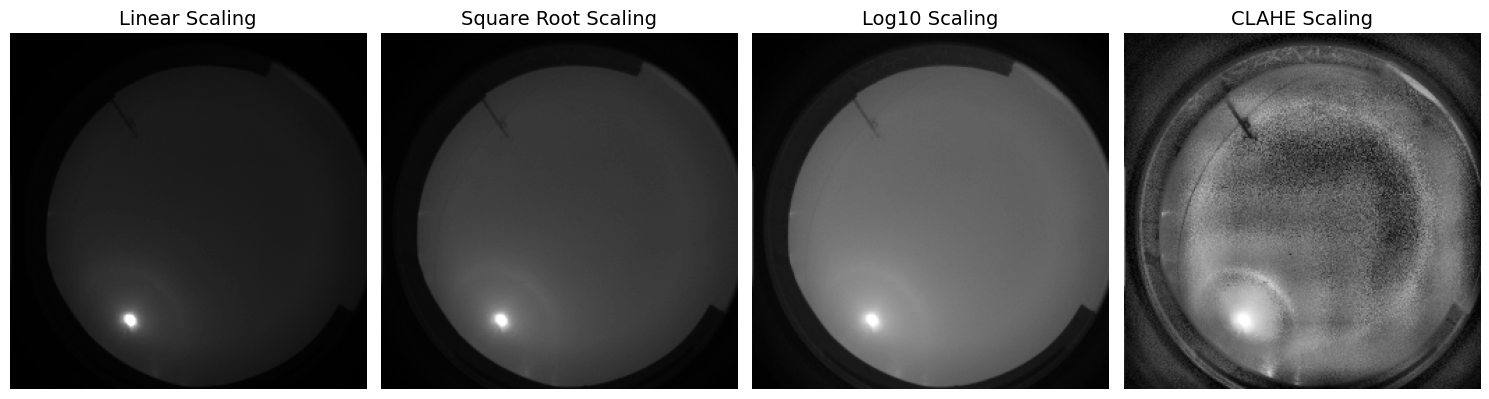

In [20]:
# Get the image data
image = camera_dict[list(camera_dict.keys())[frame]]

# Do various processing
# Linear scaling
image_linear = cv2.convertScaleAbs(image, alpha=(255.0/65535.0))

# Clahe then linear scaling
clahe = cv2.createCLAHE(clipLimit=3, tileGridSize=(8, 8))
image_clahe = cv2.convertScaleAbs(clahe.apply(image), alpha=(255.0/65535.0))

# Calgary method
image_sqrt = np.sqrt(image)
image_sqrt = image_sqrt - np.min(image_sqrt)
image_sqrt = 255*(image_sqrt/np.max(image_sqrt))
image_sqrt = image_sqrt.astype('uint8')

# Log scaling
image_log = np.log10(image)
image_log = image_log - np.min(image_log)
image_log = 255*(image_log/np.max(image_log))
image_log = image_log.astype('uint8')


# Setup figure to show images
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

# Plot the images
axs[0].imshow(image_linear, cmap='gray')
axs[1].imshow(image_sqrt, cmap='gray')
axs[2].imshow(image_log, cmap='gray')
axs[3].imshow(image_clahe, cmap='gray')

# Label images
axs[0].set_title('Linear Scaling', fontsize=14)
axs[1].set_title('Square Root Scaling', fontsize=14)
axs[2].set_title('Log10 Scaling', fontsize=14)
axs[3].set_title('CLAHE Scaling', fontsize=14)

for ax in axs:
    ax.axis('off')

plt.tight_layout()
#plt.savefig(f'../../reports/figures/example-processing/example-{imager}-{date}-{frame}.jpg', dpi=300)


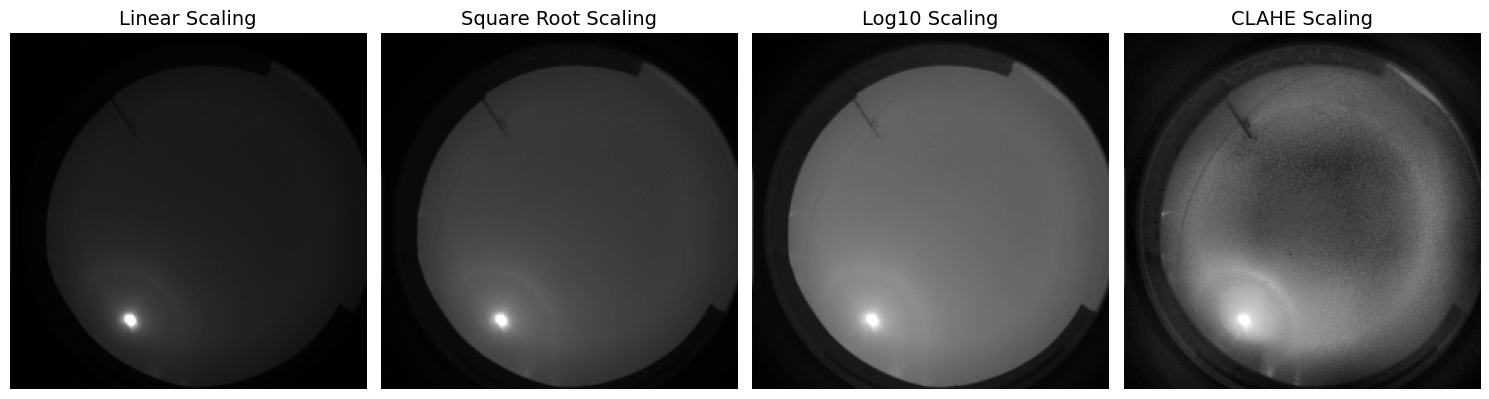

In [21]:
# Get the image data
image = camera_dict[list(camera_dict.keys())[frame]]

# Do various processing
# Linear scaling
image_linear = cv2.convertScaleAbs(image, alpha=(255.0/65535.0))

# Clahe then linear scaling
clahe = cv2.createCLAHE(clipLimit=3, tileGridSize=(4, 4))
image_clahe = cv2.convertScaleAbs(clahe.apply(image), alpha=(255.0/65535.0))

# Calgary method
image_sqrt = np.sqrt(image)
image_sqrt = image_sqrt - np.min(image_sqrt)
image_sqrt = 255*(image_sqrt/np.max(image_sqrt))
image_sqrt = image_sqrt.astype('uint8')

# Log scaling
image_log = np.log10(image)
image_log = image_log - np.min(image_log)
image_log = 255*(image_log/np.max(image_log))
image_log = image_log.astype('uint8')


# Setup figure to show images
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

# Plot the images
axs[0].imshow(image_linear, cmap='gray')
axs[1].imshow(image_sqrt, cmap='gray')
axs[2].imshow(image_log, cmap='gray')
axs[3].imshow(image_clahe, cmap='gray')

# Label images
axs[0].set_title('Linear Scaling', fontsize=14)
axs[1].set_title('Square Root Scaling', fontsize=14)
axs[2].set_title('Log10 Scaling', fontsize=14)
axs[3].set_title('CLAHE Scaling', fontsize=14)

for ax in axs:
    ax.axis('off')

plt.tight_layout()
#plt.savefig(f'../../reports/figures/example-processing/example-{imager}-{date}-{frame}.jpg', dpi=300)
